<a href="https://colab.research.google.com/github/Nadim-Hasan/DataScience/blob/main/Final_term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
import math
import sklearn
from sklearn import metrics

In [48]:
data = pd.read_csv("covidoutcomes.csv",encoding='cp1252')

In [49]:
import os
print(os.listdir())

['.config', 'covidoutcomes.csv', 'sample_data']


In [50]:
data.shape

(975, 19)

In [51]:
data.head()

,Age,Sex,Did you had your COVID test,Covid results,Physical problem prior to COVID19,COVID-19 Duration,Did you consume any supplements or Medicine during COVID19,Did you used oxygen support,Did you used a ventilator while on COVID19,Were you hospitalized,You spent time in the intensive care unit,P1,p2,p3,p4,p5,p6,p7,p8
0,23,Male,Yes,Positive,None,2,Yes,No,No,No,No,Tiredness,Difficult breathing,Chest pain,Headache,NaN,NaN,NaN,NaN
1,33,Male,Yes,Positive,None,2,No,No,No,No,No,Tiredness,Hair fall,Sleeping problem,NaN,NaN,NaN,NaN,NaN
2,24,Male,Yes,Positive,None,2,Yes,No,No,No,No,Tiredness,Headace,Sleeping problem,NaN,NaN,NaN,NaN,NaN
3,33,Male,Yes,Positive,Lost smell and taste,3,No,No,No,No,No,Headache,Sleeping problem,Change in menstrual cycle,Disentry,NaN,NaN,NaN,NaN
4,30,Male,Yes,Positive,Lost smell and taste,3,No,No,No,No,No,Headache,Sleeping problem,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
data.describe()


,Age
count,975.000000
mean,31.205128
std,7.880588
min,15.000000
25%,24.000000
50%,30.000000
75%,36.000000
max,55.000000


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 19 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Age                                                         975 non-null    int64 
 1   Sex                                                         975 non-null    object
 2   Did you had your COVID test                                 975 non-null    object
 3   Covid results                                               975 non-null    object
 4   Physical problem prior to COVID19                           975 non-null    object
 5   COVID-19 Duration                                           975 non-null    object
 6   Did you consume any supplements or Medicine during COVID19  975 non-null    object
 7   Did you used oxygen support                                 975 non-null    object
 8   Did you us

In [54]:
#transform categorical variable
data['Sex'] = data['Sex'].astype('category')
data['Did you had your COVID test'] = data['Did you had your COVID test'].astype('category')
data['Covid results'] = data['Covid results'].astype('category')
data['Physical problem prior to COVID19'] = data['Physical problem prior to COVID19'].astype('category')
data['COVID-19 Duration'] = data['COVID-19 Duration'].astype('category')
data['Did you consume any supplements or Medicine during COVID19'] = data['Did you consume any supplements or Medicine during COVID19'].astype('category')
data['Did you used oxygen support'] = data['Did you used oxygen support'].astype('category')
data['Did you used a ventilator while on COVID19'] = data['Did you used a ventilator while on COVID19'].astype('category')
data['Were you hospitalized'] = data['Were you hospitalized'].astype('category')
data['You spent time in the intensive care unit'] = data['You spent time in the intensive care unit'].astype('category')
data['P1'] = data['P1'].astype('category')
data['p2'] = data['p2'].astype('category')
data['p3'] = data['p3'].astype('category')
data['p4'] = data['p4'].astype('category')
data['p5'] = data['p5'].astype('category')
data['p6'] = data['p6'].astype('category')
data['p7'] = data['p7'].astype('category')
data['p8'] = data['p8'].astype('category')


df = pd.DataFrame(data)
df.head()
print(data.dtypes)

Age                                                              int64
Sex                                                           category
Did you had your COVID test                                   category
Covid results                                                 category
Physical problem prior to COVID19                             category
COVID-19 Duration                                             category
Did you consume any supplements or Medicine during COVID19    category
Did you used oxygen support                                   category
Did you used a ventilator while on COVID19                    category
Were you hospitalized                                         category
You spent time in the intensive care unit                     category
P1                                                            category
p2                                                            category
p3                                                            category
p4    

In [55]:
df['Sex'] = df['Sex'].cat.codes
df['Did you had your COVID test'] = df['Did you had your COVID test'].cat.codes
df['Covid results'] = df['Covid results'].cat.codes
df['Physical problem prior to COVID19'] = df['Physical problem prior to COVID19'].cat.codes
df['COVID-19 Duration'] = df['COVID-19 Duration'].cat.codes
df['Did you consume any supplements or Medicine during COVID19'] = df['Did you consume any supplements or Medicine during COVID19'].cat.codes
df['Did you used oxygen support'] = df['Did you used oxygen support'].cat.codes
df['Did you used a ventilator while on COVID19'] = df['Did you used a ventilator while on COVID19'].cat.codes
df['Were you hospitalized'] = df['Were you hospitalized'].cat.codes
df['You spent time in the intensive care unit'] = df['You spent time in the intensive care unit'].cat.codes
df['P1'] = df['P1'].cat.codes
df['p2'] = df['p2'].cat.codes
df['p3'] = df['p3'].cat.codes
df['p4'] = df['p4'].cat.codes
df['p5'] = df['p5'].cat.codes
df['p6'] = df['p6'].cat.codes
df['p7'] = df['p7'].cat.codes
df['p8'] = df['p8'].cat.codes



In [56]:
# Replace -1 with 0 for all columns
df = df.applymap(lambda x: 0 if x == -1 else x)
df.head()

,Age,Sex,Did you had your COVID test,Covid results,Physical problem prior to COVID19,COVID-19 Duration,Did you consume any supplements or Medicine during COVID19,Did you used oxygen support,Did you used a ventilator while on COVID19,Were you hospitalized,You spent time in the intensive care unit,P1,p2,p3,p4,p5,p6,p7,p8
0,23,1,0,0,16,1,1,0,0,0,0,7,0,2,2,0,0,0,0
1,33,1,0,0,16,1,0,0,0,0,0,7,1,8,0,0,0,0,0
2,24,1,0,0,16,1,1,0,0,0,0,7,8,14,0,0,0,0,0
3,33,1,0,0,14,2,0,0,0,0,0,2,4,1,0,0,0,0,0
4,30,1,0,0,14,2,0,0,0,0,0,2,4,0,0,0,0,0,0


In [57]:
print(data.dtypes)

Age                                                           int64
Sex                                                            int8
Did you had your COVID test                                    int8
Covid results                                                  int8
Physical problem prior to COVID19                              int8
COVID-19 Duration                                              int8
Did you consume any supplements or Medicine during COVID19     int8
Did you used oxygen support                                    int8
Did you used a ventilator while on COVID19                     int8
Were you hospitalized                                          int8
You spent time in the intensive care unit                      int8
P1                                                             int8
p2                                                             int8
p3                                                             int8
p4                                              

In [58]:
x = df[['Sex', 'Did you had your COVID test', 'Covid results', 'Physical problem prior to COVID19', 'COVID-19 Duration','Did you consume any supplements or Medicine during COVID19','Did you used oxygen support','Did you used a ventilator while on COVID19','Were you hospitalized','You spent time in the intensive care unit']]

In [59]:
y = df[['P1','p2','p3','p4','p5','p6','p7','p8']]

In [60]:
y


,P1,p2,p3,p4,p5,p6,p7,p8
0,7,0,2,2,0,0,0,0
1,7,1,8,0,0,0,0,0
2,7,8,14,0,0,0,0,0
3,2,4,1,0,0,0,0,0
4,2,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
970,2,4,1,0,0,0,0,0
971,5,3,0,0,0,0,0,0
972,7,2,7,0,0,0,0,0
973,1,1,9,0,0,0,0,0


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x.shape, y.shape)

(682, 10)
(682, 8)
(293, 10)
(293, 8)
(975, 10) (975, 8)


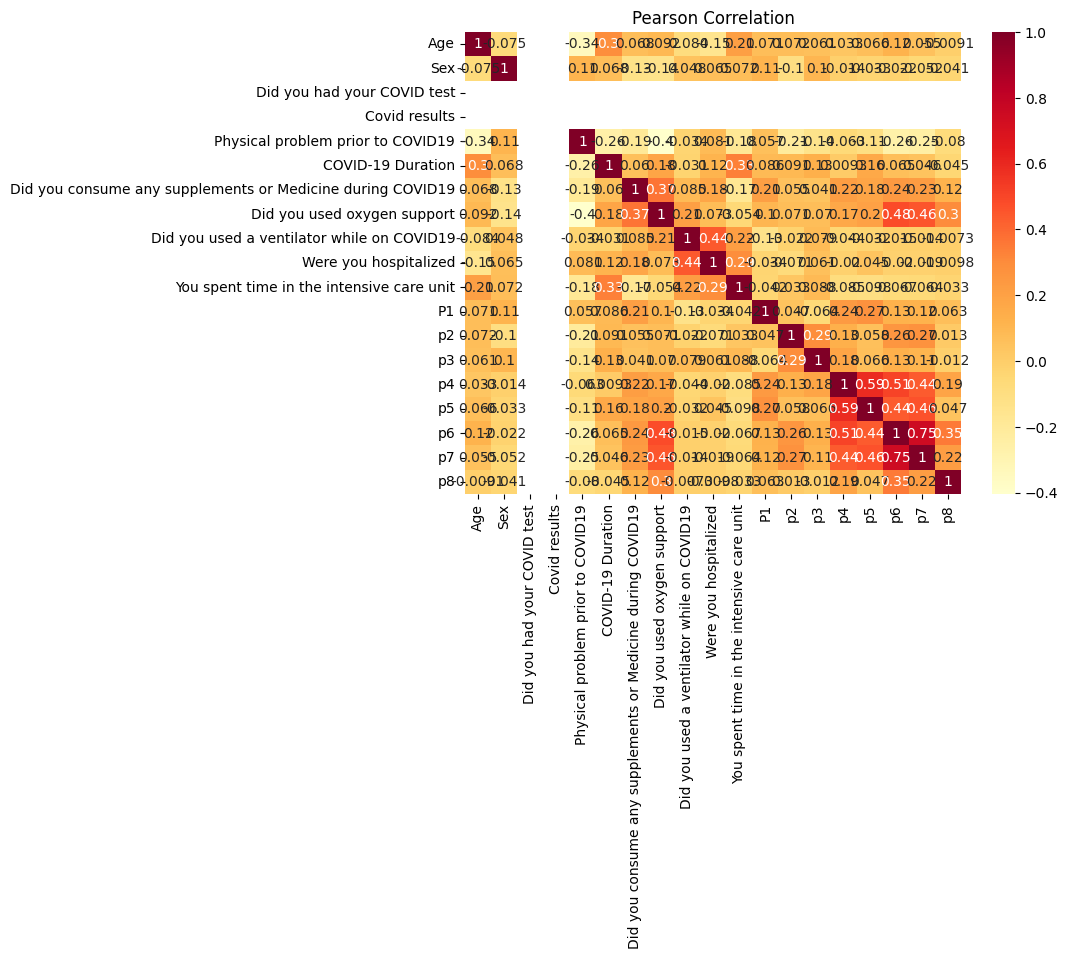

In [62]:
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(), annot = True, cmap = 'YlOrRd')
plt.title("Pearson Correlation")
plt.show()

In [63]:
x = df[['Sex', 'Did you had your COVID test', 'Covid results', 'Physical problem prior to COVID19', 'COVID-19 Duration','Did you consume any supplements or Medicine during COVID19','Did you used oxygen support','Did you used a ventilator while on COVID19','Were you hospitalized','You spent time in the intensive care unit']]

In [64]:
y = df[['P1','p2','p3','p4','p5','p6','p7','p8']]

In [65]:
y


,P1,p2,p3,p4,p5,p6,p7,p8
0,7,0,2,2,0,0,0,0
1,7,1,8,0,0,0,0,0
2,7,8,14,0,0,0,0,0
3,2,4,1,0,0,0,0,0
4,2,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
970,2,4,1,0,0,0,0,0
971,5,3,0,0,0,0,0,0
972,7,2,7,0,0,0,0,0
973,1,1,9,0,0,0,0,0


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x.shape, y.shape)

(682, 10)
(682, 8)
(293, 10)
(293, 8)
(975, 10) (975, 8)


In [67]:
# linear regression for multioutput regression
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
# create datasets
x, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=8, random_state=1, noise=0.5)
# define model
model = LinearRegression()
# fit model
model.fit(x, y)

from sklearn.metrics import mean_squared_error

# Predict the outputs using the trained model
y_pred = model.predict(x)

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)

print("Mean Squared Error:", mse)



Mean Squared Error: 0.2500225541483251


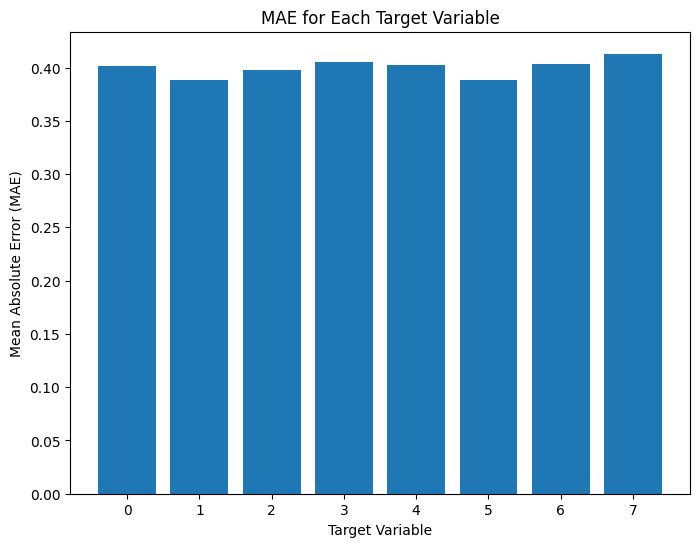

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Predict the outputs using the trained model
y_pred = model.predict(x)

# Calculate the mean absolute error for each target variable
mae_scores = np.mean(np.abs(y - y_pred), axis=0)

# Plot the MAE scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(mae_scores)), mae_scores)
plt.xlabel('Target Variable')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Each Target Variable')
plt.xticks(range(len(mae_scores)))
plt.show()

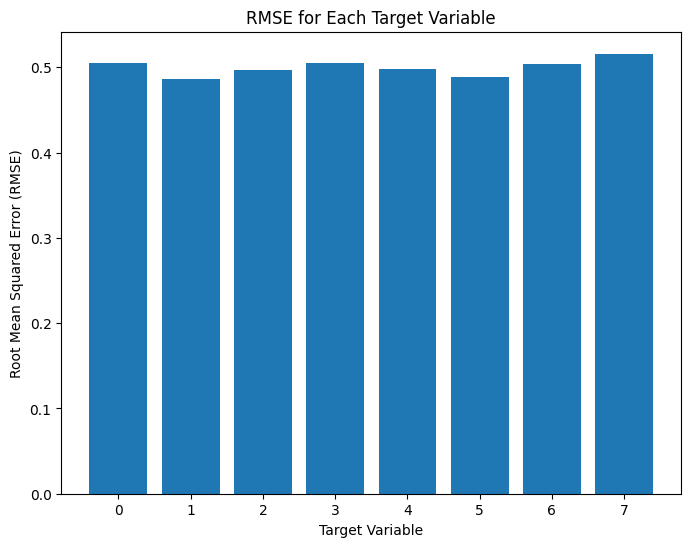

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Predict the outputs using the trained model
y_pred = model.predict(x)

# Calculate the root mean squared error (RMSE) for each target variable
rmse_scores = np.sqrt(mean_squared_error(y, y_pred, multioutput='raw_values'))

# Plot the RMSE scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(rmse_scores)), rmse_scores)
plt.xlabel('Target Variable')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE for Each Target Variable')
plt.xticks(range(len(rmse_scores)))
plt.show()


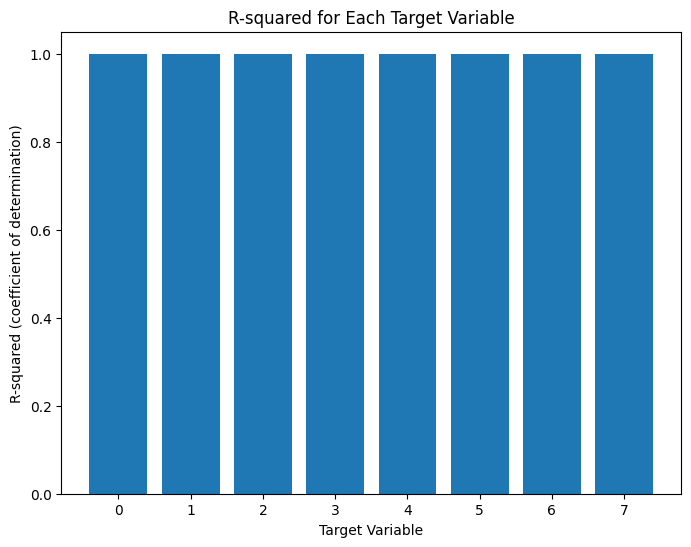

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Predict the outputs using the trained model
y_pred = model.predict(x)

# Calculate the R-squared (coefficient of determination) for each target variable
r2_scores = r2_score(y, y_pred, multioutput='raw_values')

# Plot the R-squared scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(r2_scores)), r2_scores)
plt.xlabel('Target Variable')
plt.ylabel('R-squared (coefficient of determination)')
plt.title('R-squared for Each Target Variable')
plt.xticks(range(len(r2_scores)))
plt.show()


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    #'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}


In [72]:
# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation results
    print(f'{name}:')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Root Mean Squared Error: {rmse:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'R-squared: {r2:.4f}')
    print('-------------------------')

Linear Regression:
Mean Squared Error: 0.2439
Root Mean Squared Error: 0.4939
Mean Absolute Error: 0.3937
R-squared: 1.0000
-------------------------
Decision Tree:
Mean Squared Error: 8009.0902
Root Mean Squared Error: 89.4935
Mean Absolute Error: 65.9574
R-squared: 0.5198
-------------------------
Random Forest:
Mean Squared Error: 2961.4872
Root Mean Squared Error: 54.4195
Mean Absolute Error: 36.2810
R-squared: 0.8287
-------------------------
K-Nearest Neighbors:
Mean Squared Error: 3516.0619
Root Mean Squared Error: 59.2964
Mean Absolute Error: 45.1564
R-squared: 0.7888
-------------------------


In [73]:
from sklearn.metrics import accuracy_score

threshold = 0.5
accuracies = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Convert regression predictions to binary labels
    y_pred_binary = np.where(y_pred >= threshold, 1, 0)
    y_test_binary = np.where(y_test >= threshold, 1, 0)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    accuracies[name] = accuracy

# Print the accuracies
for name, accuracy in accuracies.items():
    print(f'{name}: Accuracy = {accuracy:.4f}')



Linear Regression: Accuracy = 0.9850
Decision Tree: Accuracy = 0.3900
Random Forest: Accuracy = 0.5400
K-Nearest Neighbors: Accuracy = 0.5050


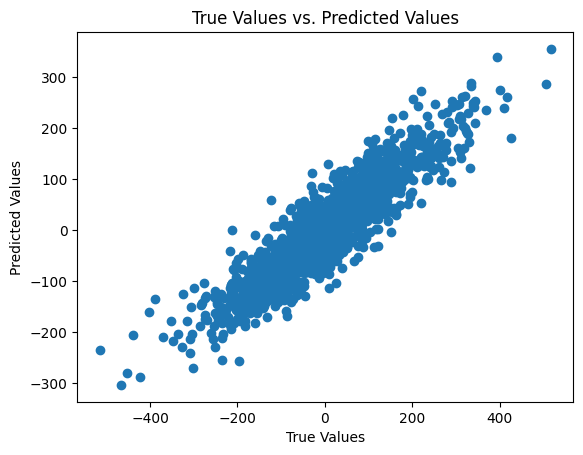

In [74]:
import matplotlib.pyplot as plt

# Plot scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')
plt.show()

In [75]:
from sklearn.linear_model import LinearRegression

# create a LinearRegression object
model = LinearRegression()

# train the model on the training data
model.fit(x_train, y_train)

# make predictions on the test data
y_pred = model.predict(x_test)

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate r-squared
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Absolute Error: 0.39369175016382707
Mean Squared Error: 0.24388995016277787
R-squared: 0.9999811939040449


In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x.shape, y.shape)

(700, 10)
(700, 8)
(300, 10)
(300, 8)
(1000, 10) (1000, 8)


In [78]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object
rf = RandomForestRegressor(random_state=0)

# Train the regressor on the training data
rf.fit(x_train, y_train)

# Make predictions
y_pred = rf.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R-squared: {r2:.4f}')


Mean Squared Error: 2312.0780
Root Mean Squared Error: 48.0841
Mean Absolute Error: 33.7081
R-squared: 0.8677


In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Initialize the Random Forest model
model = RandomForestRegressor()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print('Random Forest:')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R-squared: {r2:.4f}')



Random Forest:
Mean Squared Error: 2930.8534
Root Mean Squared Error: 54.1374
Mean Absolute Error: 36.3964
R-squared: 0.8311


In [84]:
x = df[['Sex', 'Did you had your COVID test', 'Covid results', 'Physical problem prior to COVID19', 'COVID-19 Duration','Did you consume any supplements or Medicine during COVID19','Did you used oxygen support','Did you used a ventilator while on COVID19','Were you hospitalized','You spent time in the intensive care unit']]

y = df[['P1','p2','p3','p4','p5','p6','p7','p8']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
from sklearn.linear_model import LinearRegression

# create a LinearRegression object
model = LinearRegression()

# train the model on the training data
model.fit(x_train, y_train)

# make predictions on the test data
y_pred = model.predict(x_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate r-squared
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
# create a Random Forest Classifier object
rfc = RandomForestClassifier(random_state=0)

# create a MultiOutputClassifier object
clf = MultiOutputClassifier(rfc)

# train the classifier on the training data
clf.fit(x_train, y_train)

# make predictions on the test data
y_pred = clf.predict(x_test)

print('Accuracy:', accuracy)
#print('Precision:', precision)
#print('Recall:', recall)

from sklearn.metrics import confusion_matrix

for i, label in enumerate(y.columns):
    cm = confusion_matrix(y_test[label], y_pred[:, i])
    print(f"Confusion matrix for {label}:\n{cm}\n")

from sklearn.metrics import accuracy_score

# calculate accuracy for each class separately
acc_scores = []
for i in range(len(y_test.columns)):
    acc_score = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    acc_scores.append(acc_score)

# calculate average accuracy across all classes
avg_acc_score = sum(acc_scores) / len(acc_scores)
print("Average accuracy:", avg_acc_score)

(682, 10)
(682, 8)
(293, 10)
(293, 8)
Mean Absolute Error: 1.0724816454037853
Mean Squared Error: 3.8340388297344017
R-squared: 0.20712162398107947
MSE: 3.8340388297344017
MAE: 1.0724816454037853
Accuracy: 0.505
Confusion matrix for P1:
[[  5   0   0   0   0   5   1   0   0   0]
 [  0   5   0   0   0   0   5   0   0   0]
 [  0   0  16   0   0   0  14   0   0   0]
 [  0   0   0   5   0   0   0   0   0   0]
 [  0   0   0   0   4   9  13   0   0   0]
 [  0   0   0   0   0   5  17   0   0   0]
 [  0   3   9   0   0   2 166   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   3   0   0   0]
 [  0   0   0   0   0   0   2   0   0   3]]

Confusion matrix for p2:
[[59 12  5  0  2  0  0  0  0  0  0]
 [22 54  0  0  4  0  0  0  0  0  0]
 [ 7  6 38  0  7  0  0  0  0  0  0]
 [15  3  2  2  0  0  0  0  0  0  0]
 [ 0  9  1  0 20  0  0  0  0  0  0]
 [ 0  2  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  

In [85]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Multi-Output Random Forest model
model = RandomForestRegressor()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print('Multi-Output Random Forest Regression:')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R-squared: {r2:.4f}')


Multi-Output Random Forest Regression:
Mean Squared Error: 2.2967
Root Mean Squared Error: 1.5155
Mean Absolute Error: 0.6385
R-squared: 0.5870
